# Estimando 

El objetivo de esta actividad es que los/as alumnos/as reflexionen sobre los procesos de medición y de estimación. También, amigarse con las incertezas y los errores.

En un frasco, llamémoslo Frasco 1, ponemos una cantidad $n$ de algún elemento que sea relativamente fácil de contar; por ejemplo, porotos, monedas de cinco centavos, etc. En el caso que les presentamos en este notebook usamos monedas de cinco centavos argentinos. En otro frasco, Frasco 2, ponemos una cantidad definida de esos mismos elementos, por ejemplo, 50 monedas.

La idea es que los/as alumnos/as, en grupos de tres, estimen cota inferior, valor más probable y cota superior de la cantidad de elementos en el Frasco 1 en las siguientes situaciones:

1. Observando el frasco lleno (Frasco 1) y el frasco con 50 monedas (Frasco 2).
2. Con el peso del Frasco 1 (frasco + monedas) y el peso de las 50 monedas (solo las monedas).
3. Con el peso del Frasco 1 (frasco + monedas), el peso de las 50 monedas y el peso del frasco vacío.

Recomendamos dar alguna medición "con error", por ejemplo, el peso del frasco vacío en el ejemplo está entre 125 y 130 gramos.

### Algunas reflexiones e indicaciones para la consigna para compartir con los/as alumnos/as

* Estimar implica hacer suposiciones. Indicar a los grupos que expliciten esas suposiciones, que traten de ordenar su razonamiento.
* A medida que les damos datos extra, ¿qué valor se modifica más: cota inferior, valor más probable o cota superior?
* ¿Cómo *propagarían* el error en la medición del frasco?
* El manejo de incertezas es una temática importantísima en Data Science. Una estimación sin una incerteza asociada en general tiene poco valor.
* Invitar a los alumnos a que reflexionen sobre esta consigna: A medida que vamos agregando información, ¿qué esperan que pase con las incertezas?


Pueden llevar un premio para el grupo que más se acerque al valor real en cada una de esas situaciones (tres premios). Eso genera las siguientes preguntas: ¿Usamos solamente el valor más probable?¿Cómo incorporamos la incerteza?¿Qué pasa si el valor real no está incluida en el intervalo (cota inferior, cota superior)? Por eso, una vez que ya hayan hecho las estimaciones, proponemos además esta consiga:
**¿Cómo decidirían cuál es el grupo que "mejor" estimó la cantidad de monedas?** Para simplificar, proponemos que usen solamente el intervalo, sin el valor más probable.


A continuación dejamos una pequeña muestra - para los mentores - de los resultados obtenidos en nuestra comisión. Aclaramos que el notebook está muy desprolijo.

## Resultados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv('DS_Clase_09_ejemplo_monedas.csv')
data.head(10)

,Nombre,Min1,P1,Max1,Min2,P2,Max2,Min3,P3,Max3
0,Alejandro,350,500,800,300,400,500,268.0,279.0,290.0
1,Carla Parolin,280,310,360,290,300,310,285.0,289.0,293.0
2,Matias Falivane Jhonny Rios,250,350,450,250,300,350,222.0,223.4,352.0
3,Pablo Garcia Cancellieri,250,350,450,266,291,316,NaN,NaN,NaN
4,Tomas Freyer,340,373,402,320,360,365,340.0,350.0,360.0
5,Yoel Estrada,50,250,300,300,370,400,290.0,303.0,320.0
6,Sofia Palucito,480,630,750,220,310,350,265.0,290.0,300.0


Los datos que les dimos

In [9]:
n_real = 283 # cantidad de monedas. Las contamos despues de hacer la experiencia

# Todos los pesos en gramos
peso_frasco_lleno = 705 # monedas + frasco
peso_frasco_vacio_ci = 125 # cota inferior peso frasco vacio
peso_frasco_vacio_cs = 130 # cota superior peso frasco vacio
peso_50_monedas = 100 

$N_{monedas} = \frac{Peso Frasco Lleno - Peso Frasco Vacio}{100}*50$

**Experiencia 2**

In [10]:
# Asumiendo que el peso del frasco es despreciable frente al peso de las monedas.
# Cota superior

n_estimado_2 = peso_frasco_lleno*50/peso_50_monedas
print(n_estimado_2)


352.5


**Experiencia 3**

In [11]:
n_estimado_3_ci = (peso_frasco_lleno - peso_frasco_vacio_ci)*50/peso_50_monedas
n_estimado_3_cs = (peso_frasco_lleno - peso_frasco_vacio_cs)*50/peso_50_monedas
print(n_estimado_3_ci, n_estimado_3_cs)

290.0 287.5


**Algunos Gráficos**

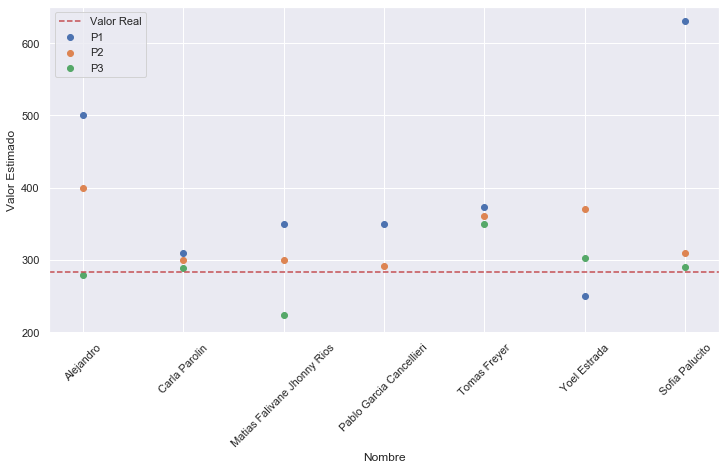

In [12]:
plt.figure(figsize = (12,6))
plt.scatter(data['Nombre'], data['P1'], label = 'P1')
plt.scatter(data['Nombre'], data['P2'], label = 'P2')
plt.scatter(data['Nombre'], data['P3'], label = 'P3')
plt.xlabel('Nombre')
plt.ylabel('Valor Estimado')
plt.xticks(rotation=45)
plt.axhline(n_real,ls = '--', c = 'r', label = 'Valor Real')
plt.legend()
plt.show()

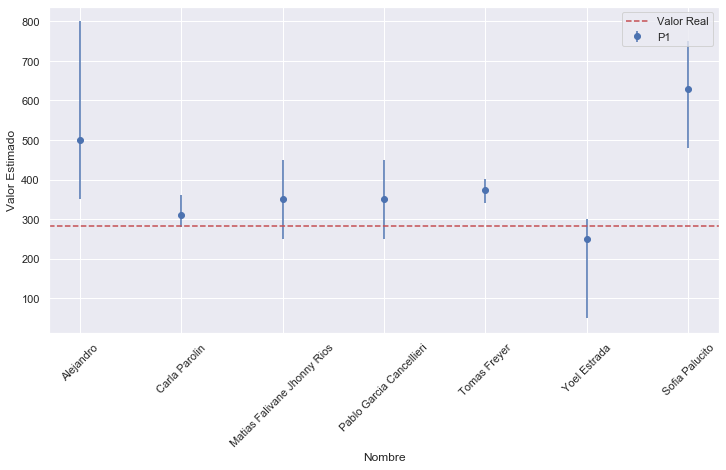

In [13]:
plt.figure(figsize = (12,6))
plt.errorbar(x = data['Nombre'],y = data['P1'], yerr = (data['P1'] - data['Min1'], data['Max1'] - data['P1']), fmt='o', label = 'P1')
# plt.scatter(data['Nombre'], data['P2'], label = 'P2')
# plt.scatter(data['Nombre'], data['P3'], label = 'P3')
plt.xlabel('Nombre')
plt.ylabel('Valor Estimado')
plt.xticks(rotation=45)
plt.axhline(n_real,ls = '--', c = 'r', label = 'Valor Real')
plt.legend()
plt.show()

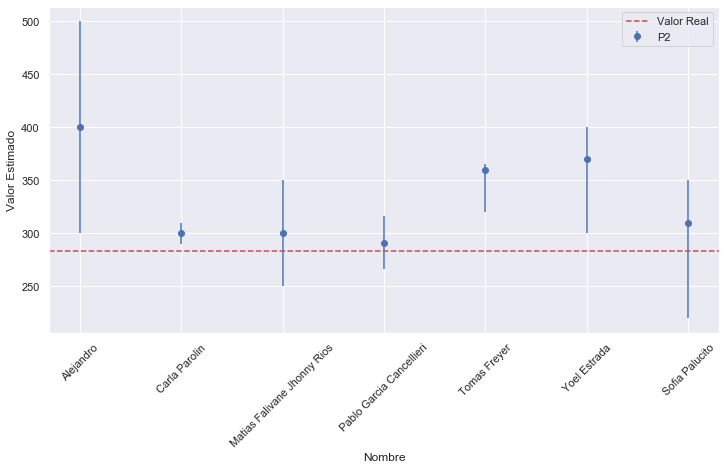

In [14]:
plt.figure(figsize = (12,6))
plt.errorbar(x = data['Nombre'],y = data['P2'], yerr = (data['P2'] - data['Min2'], data['Max2'] - data['P2']), fmt='o', label = 'P2')
# plt.scatter(data['Nombre'], data['P2'], label = 'P2')
# plt.scatter(data['Nombre'], data['P3'], label = 'P3')
plt.xlabel('Nombre')
plt.ylabel('Valor Estimado')
plt.xticks(rotation=45)
plt.axhline(n_real,ls = '--', c = 'r', label = 'Valor Real')
plt.legend()
plt.show()

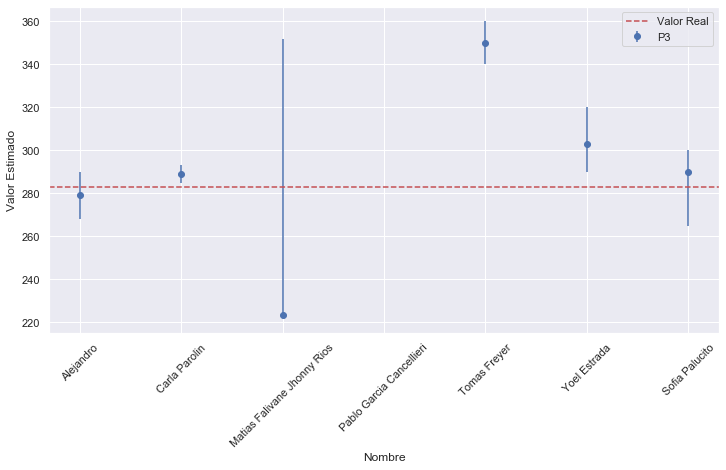

In [15]:
plt.figure(figsize = (12,6))
plt.errorbar(x = data['Nombre'],y = data['P3'], yerr = (data['P3'] - data['Min3'], data['Max3'] - data['P3']), fmt='o', label = 'P3')
# plt.scatter(data['Nombre'], data['P2'], label = 'P2')
# plt.scatter(data['Nombre'], data['P3'], label = 'P3')
plt.xlabel('Nombre')
plt.ylabel('Valor Estimado')
plt.xticks(rotation=45)
plt.axhline(n_real,ls = '--', c = 'r', label = 'Valor Real')
plt.legend()
plt.show()

In [16]:
def plot_grupo(grupo, data):
    mask = data['Nombre'] == grupo
    datos_grupo = data[mask]
    valores_probables = datos_grupo[['P1','P2','P3']].values[0]
    valores_maximos = datos_grupo[['Max1','Max2','Max3']].values[0]
    valores_minimos = datos_grupo[['Min1','Min2','Min3']].values[0]
    yerr = (valores_probables - valores_minimos, valores_maximos - valores_probables)
    plt.errorbar(x = ['Exp1','Exp2','Exp3'],y = valores_probables, yerr = yerr, fmt='o', label = nombre)

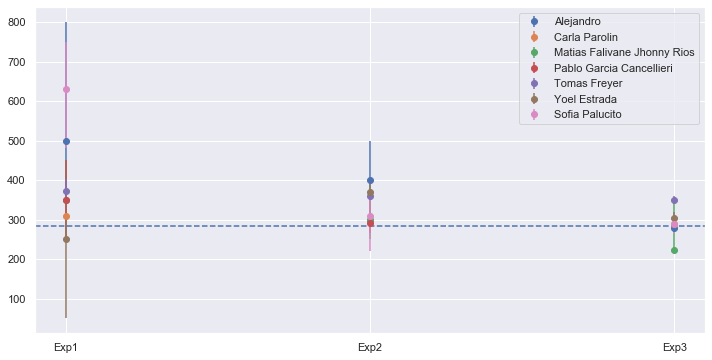

In [17]:
plt.figure(figsize = (12,6))
for nombre in data['Nombre']:
    plot_grupo(nombre, data)

plt.axhline(n_real, ls = '--')
plt.legend()
plt.show()


Este último gráfico es muy interesante. A medida que agregamos información, no solamente tienden al valor real, ¡sino que disminuyen las incertezas!